# Проектування БД

За моделлю організації даних розрізняють такі бази даних:

- **Ієрархічна**. Ієрархічна база даних може бути представлена як дерево, що складається з об'єктів різних рівнів. Між об'єктами існують зв'язки типу «предок-нащадок». При цьому можлива ситуація, коли об'єкт не має нащадків або має їх декілька, тоді як у об'єкта-нащадка обов'язково тільки один предок.
- **Графова**. Така база даних подібна до ієрархічної, за винятком того, що кожен об'єкт може мати більше одного предка.
- **Реляційна**. Реляційна база даних зберігає дані у вигляді таблиць. Найвживаніші СКБД використовують реляційну модель даних.
- **Документна (Об'єктно-орієнтована)**. У базі даних цього виду дані оформляють у вигляді моделей об'єктів.
- **Ключ-значення**. У базі даних цього виду дані оформляють у вигляді моделей об'єктів.

## Реляційні БД

Реляційна база даних — база даних, заснована на реляційній моделі даних. Слово «реляційний» походить від англ. relation (відношення). Для роботи з реляційними БД застосовують реляційні СКБД. Інакше кажучи, реляційна база даних — це база даних, яка сприймається користувачем як набір нормалізованих відношень різного ступеня.

Реляційна база даних є сукупністю елементів даних, організованих у вигляді набору формально описаних таблиць, з яких дані можуть бути доступними або повторно зібрані багатьма різними способами без необхідності реорганізації таблиць бази даних.

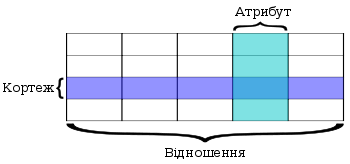

## Розуміння нормальних форм

Метою нормалізації є усунення недоліків структури БД, які призводять до шкідливої надмірності в даних, яка в свою чергу потенційно призводить до різних аномалій і порушень цілісності даних.

Теоретики реляційних баз даних у процесі розвитку теорії виявили та описали типові приклади надмірності і способи їхнього усунення.

Нормальна форма — формальна властивість відношення, яка характеризує ступінь надмірності збережуваних даних і можливі проблеми. Кожна наступна нормальна форма в нижченаведеному списку (крім ДКНФ) в деякому сенсі є досконалішою, ніж попередня, з точки зору усунення надмірності.

- [Перша нормальна форма](https://uk.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%88%D0%B0_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0_%D1%84%D0%BE%D1%80%D0%BC%D0%B0) (1НФ, 1NF)
- [Друга нормальна форма](https://uk.wikipedia.org/wiki/%D0%94%D1%80%D1%83%D0%B3%D0%B0_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0_%D1%84%D0%BE%D1%80%D0%BC%D0%B0) (2НФ, 2NF)
- [Третя нормальна форма](https://uk.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%82%D1%8F_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0_%D1%84%D0%BE%D1%80%D0%BC%D0%B0) (3НФ, 3NF)
- Нормальна форма Бойса — Кодда (НФБК, BCNF)
- Четверта нормальна форма (4НФ, 4NF)
- П'ята нормальна форма (5НФ, 5NF)
- Доменно-ключова нормальна форма (ДКНФ, DKNF).
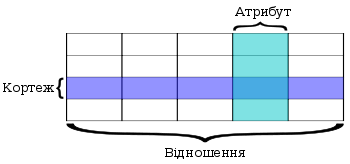

In [1]:
%load_ext sql
import iplantuml

Picked up JAVA_TOOL_OPTIONS:  -Xmx3489m


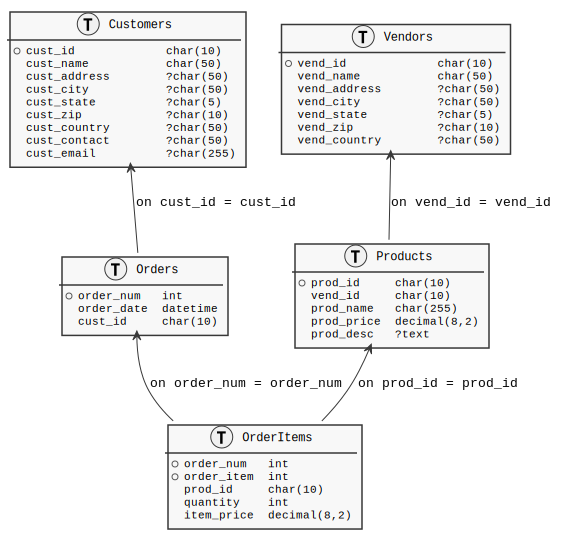

In [2]:
%%plantuml --jar 

@startuml
skinparam monochrome true
skinparam defaultFontName Courier

!define table(x) class x << (T,#ffebf3) >>
hide methods
hide stereotypes


table(Customers) {
    {field} +cust_id             char(10)
    {field} cust_name           char(50)
    {field} cust_address        ?char(50)
    {field} cust_city           ?char(50)
    {field} cust_state          ?char(5)
    {field} cust_zip            ?char(10)
    {field} cust_country        ?char(50)
    {field} cust_contact        ?char(50)
    {field} cust_email          ?char(255)
}


table(OrderItems) {
    {field} +order_num   int
    {field} +order_item  int
    {field} prod_id     char(10)
    {field} quantity    int
    {field} item_price  decimal(8,2)
}

Orders <-- OrderItems : on order_num = order_num
Products <-- OrderItems : on prod_id = prod_id

table(Orders) {
    {field} +order_num   int
    {field} order_date  datetime
    {field} cust_id     char(10)
}

Customers <-- Orders : on cust_id = cust_id

table(Products) {
    {field} +prod_id     char(10)
    {field} vend_id     char(10)
    {field} prod_name   char(255)
    {field} prod_price  decimal(8,2)
    {field} prod_desc   ?text
}

Vendors <-- Products : on vend_id = vend_id

table(Vendors) {
    {field} +vend_id             char(10)
    {field} vend_name           char(50)
    {field} vend_address        ?char(50)
    {field} vend_city           ?char(50)
    {field} vend_state          ?char(5)
    {field} vend_zip            ?char(10)
    {field} vend_country        ?char(50)
}
@enduml 

In [3]:
%%sql mysql://root@localhost
SHOW DATABASES;

Connecting to 'mysql://root@localhost'

5 rows affected.

Database
information_schema
mysql
performance_schema
sys
test


In [4]:
%sql DROP DATABASE IF EXISTS test;

Running query in 'mysql://root@localhost'

++
||
++
++

In [5]:
%sql CREATE DATABASE test;

Running query in 'mysql://root@localhost'

1 rows affected.

++
||
++
++

In [6]:
%sql SHOW DATABASES;

Running query in 'mysql://root@localhost'

5 rows affected.

Database
information_schema
mysql
performance_schema
sys
test
